In [35]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
dataset = pd.read_csv("house_price_prediction.csv")
dataset.head()
dataset = dataset.dropna()
dataset.isnull().sum()

avg_income            0
avg_area_house_age    0
avg_area_num_rooms    0
avg_bedrooms          0
avg_population        0
price                 0
dtype: int64

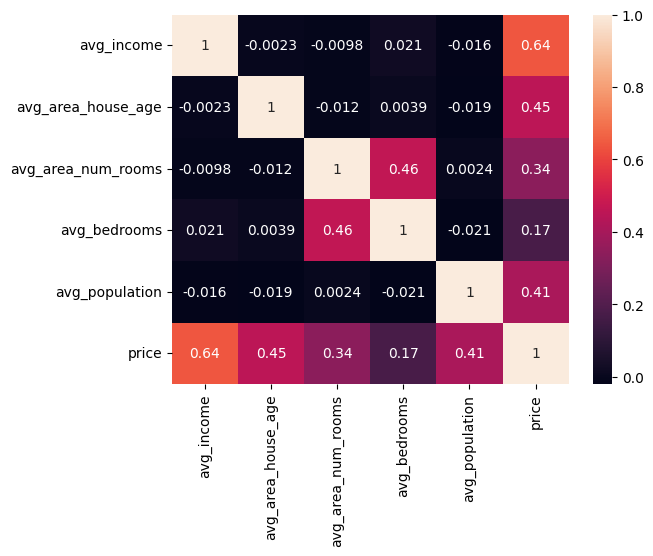

In [36]:
sns.heatmap(data=dataset.corr() , annot = True)
plt.show()

In [37]:
x = dataset.iloc[:,:-1]
y = dataset["price"]


In [38]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x) ,columns=x.columns)

In [39]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state=42)

In [68]:
from sklearn.linear_model import LinearRegression , Lasso ,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Linear Regression

In [41]:
lr = LinearRegression()
lr.fit(x_train , y_train)
lr.score(x_test,y_test)*100

91.72709716777054

In [65]:
print(mean_absolute_error(y_test , lr.predict(x_test)))
print(mean_squared_error(y_test , lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test , lr.predict(x_test))))

83034.97988314531
10631960441.627361
103111.39821390923


In [42]:
lr.coef_

array([ 2.28447813e+05,  1.63940967e+05,  1.23097609e+05, -1.07337800e+02,
        1.49950009e+05])

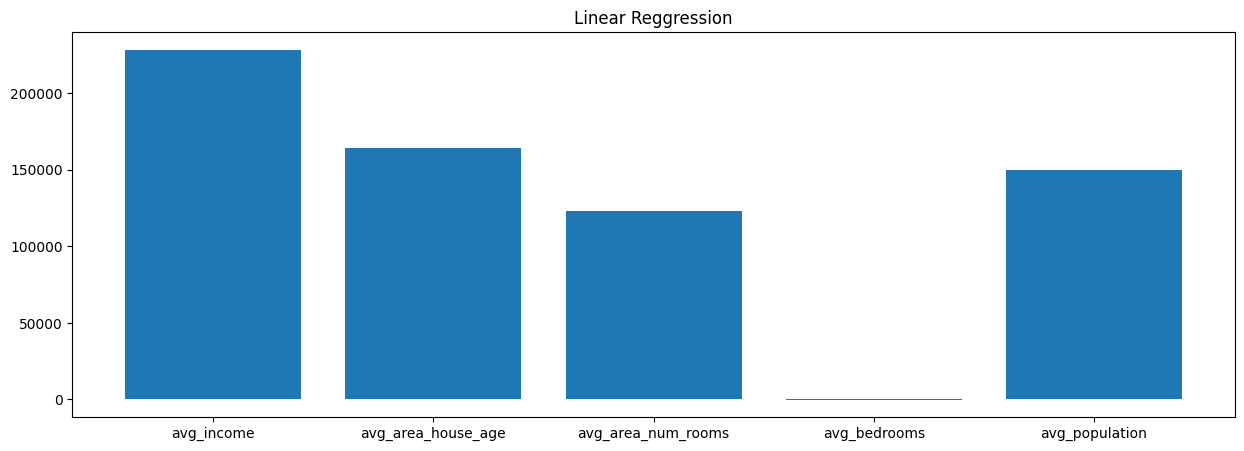

In [45]:
plt.figure(figsize=(15,5))
plt.title("Linear Reggression")
plt.bar(x.columns , lr.coef_)
plt.show()

# Lasso Regression

In [57]:
la = Lasso(alpha = 100)
la.fit(x_train , y_train)
la.score(x_test,y_test)*100

91.72715082060522

In [66]:
print(mean_absolute_error(y_test , la.predict(x_test)))
print(mean_squared_error(y_test , la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test , la.predict(x_test))))

83032.24019265524
10631891489.431553
103111.06385558998


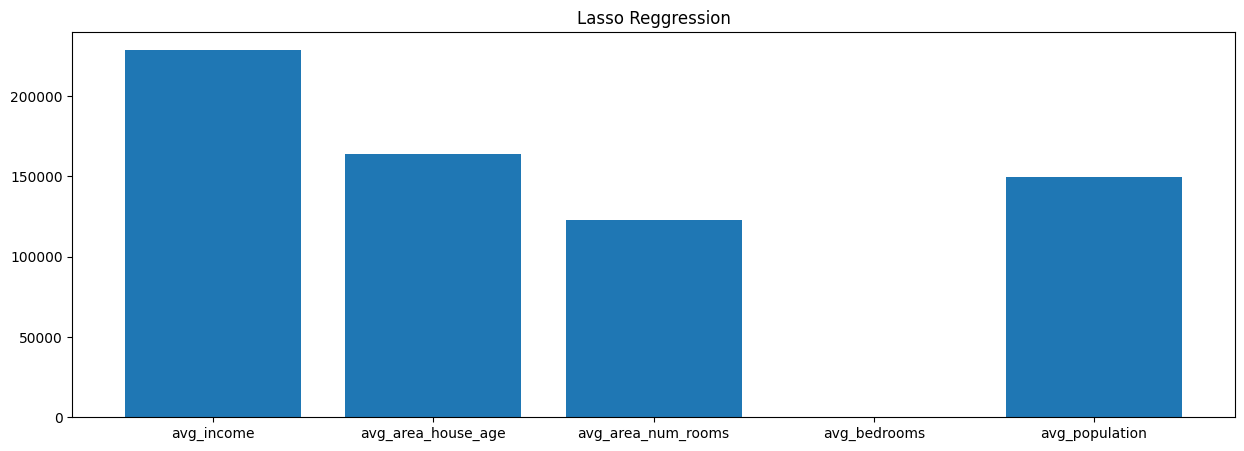

In [58]:
plt.figure(figsize=(15,5))
plt.title("Lasso Reggression")
plt.bar(x.columns , la.coef_)
plt.show()

# Ridge regression

In [59]:
r = Ridge(alpha = 100)
r.fit(x_train , y_train)
r.score(x_test,y_test)*100

91.61816202385631

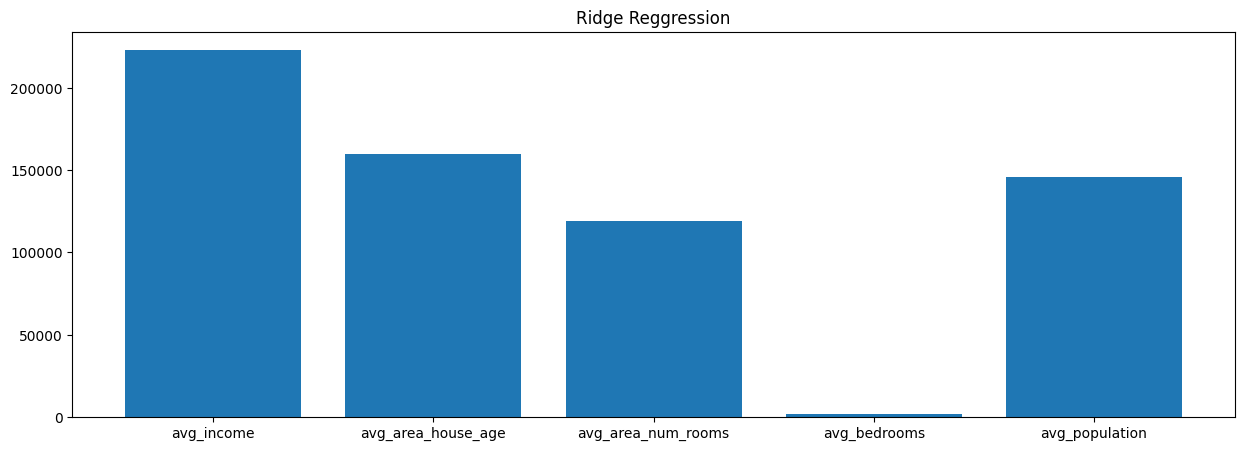

In [60]:
plt.figure(figsize=(15,5))
plt.title("Ridge Reggression")
plt.bar(x.columns , r.coef_)
plt.show()

In [67]:
print(mean_absolute_error(y_test , r.predict(x_test)))
print(mean_squared_error(y_test , r.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test , r.predict(x_test))))

83425.9926173813
10771958960.198969
103788.04825315374
